In [16]:
import torch
import torchvision

MODEL_PYTORCH    = 'mobilenet_v2.pth'
MODEL_ONNX       = 'mobilenet_v2.onnx'
MODEL_TENSORFLOW = 'mobilenet_v2.pb'

In [ ]:
# 1. pytorch -> ONNX
# reference: https://pytorch.org/docs/stable/onnx.html
dummy_input = torch.randn(10,3,224,224, device='cuda')
model = torchvision.models.mobilenet_v2(pretrained=True).cuda()
# save pytorch model for visualizing in netron
torch.save(model, MODEL_PYTORCH)

input_names = [ "actual_input_1" ] + [ "learned_%d" % i for i in range(16) ]
output_names = [ "output1" ]
torch.onnx.export(model, dummy_input, MODEL_ONNX, verbose=True, input_names=input_names, output_names=output_names)

# --- end of log ---
#   %output1 : Float(10:1000, 1000:1) = onnx::Gemm[alpha=1., beta=1., transB=1](%472, %classifier.1.weight, %classifier.1.bias) # /home/junhee/anaconda3/envs/cdpp/lib/python3.7/site-packages/torch/nn/functional.py:1674:0
#  return (%output1)

In [ ]:
# 2. ONNX -> tensorflow
! onnx-tf convert -i mobilenet_v2.onnx -o ./mobilenet_v2.pb

# --- end of log ---
# 2020-09-07 12:07:11,732 - onnx-tf - INFO - Converting completes successfully.

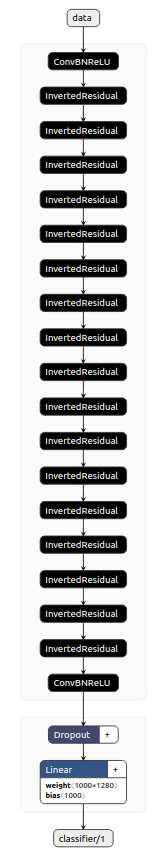

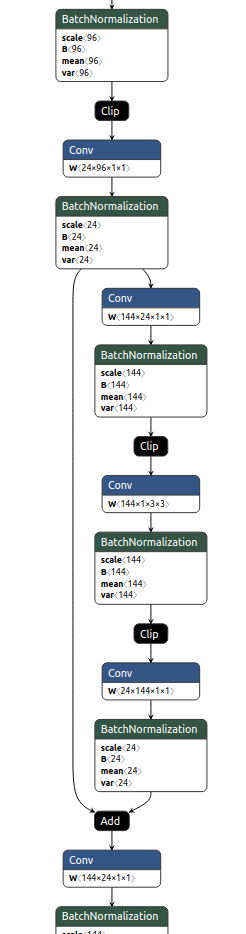

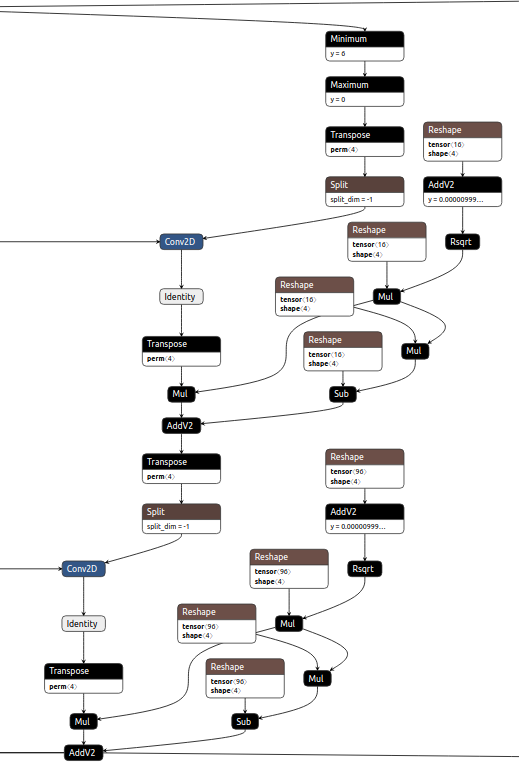

In [21]:
from IPython.display import Image
from IPython.display import display
display()
files = [MODEL_PYTORCH, MODEL_ONNX, MODEL_TENSORFLOW]
images = [Image(file+'.png') for file in files]
display(*images)